In [212]:
import datetime
import os.path
import pickle
from utility import load_categories, cp_to_date,load_appliance_time,merge_overlapping_intervals,load_daily_activity_dic, plot_activity, load_activity_dic
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
import os
plt.rcParams['font.family'] = 'Times New Roman'

from datetime import timedelta
warnings.filterwarnings("ignore")

In [213]:
def time_lst_to_dic(lst):
    date_dict = {}
    for start, end in lst:
        if start.date()<pd.to_datetime("2014-8-01 00:00:00"):
            date = start.date()  # 获取日期部分
            if date not in date_dict:
                date_dict[date] = []
            date_dict[date].append((start, end))
    return date_dict

In [128]:
activity_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\activity_120'

activity = load_activity_dic(activity_path, ['cooking','cleaning','entertainment',"working"])

In [22]:
activity

{'cooking': [(Timestamp('2013-05-01 06:26:30', freq='30S'),
   Timestamp('2013-05-01 07:53:30', freq='30S')),
  (Timestamp('2013-05-01 12:08:00', freq='30S'),
   Timestamp('2013-05-01 13:36:00', freq='30S')),
  (Timestamp('2013-05-01 15:34:30', freq='30S'),
   Timestamp('2013-05-01 15:35:30', freq='30S')),
  (Timestamp('2013-05-01 17:03:30', freq='30S'),
   Timestamp('2013-05-01 18:48:30', freq='30S')),
  (Timestamp('2013-05-02 06:49:30', freq='30S'),
   Timestamp('2013-05-02 07:29:00', freq='30S')),
  (Timestamp('2013-05-02 11:50:00', freq='30S'),
   Timestamp('2013-05-02 11:52:00', freq='30S')),
  (Timestamp('2013-05-02 14:14:00', freq='30S'),
   Timestamp('2013-05-02 14:32:00', freq='30S')),
  (Timestamp('2013-05-02 17:34:00', freq='30S'),
   Timestamp('2013-05-02 18:27:00', freq='30S')),
  (Timestamp('2013-05-02 19:39:30', freq='30S'),
   Timestamp('2013-05-02 19:56:00', freq='30S')),
  (Timestamp('2013-05-03 06:37:00', freq='30S'),
   Timestamp('2013-05-03 06:38:30', freq='30S')),

In [23]:
# activity_dic = {}
# for activity_name, activity_time_lst in activity.items():
#     activity_dic[activity_name] = [(start, end) for start, end in activity_time_lst if start<]
# activity = activity_dic

In [24]:
# appliance_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\time_data\cooking'
# appliance_time = load_appliance_time(appliance_path,['kettle','breadmaker',"gas","microwave","toaster"])

appliance_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\time_data\cleaning'
appliance_time = load_appliance_time(appliance_path,['washing_machine','dishwasher','hair_dryer','straighteners',"iron",'vacuum'])

In [163]:
appliance_name_lst = ['washing_machine','dishwasher','hair_dryer','straighteners',"iron",'vacuum']

In [25]:
appliance_time_dic = {}

for appliance_name, appliance_time_lst in appliance_time.items():
    appliance_time_dic[appliance_name] = time_lst_to_dic(appliance_time_lst)

In [27]:
file_path=r'C:\annoticity-master (2)\anno\datasets\UK_DALE\ukdale.h5'
appliance_level_consumption = load_categories(file_path, [5,6,39,40,41,22],['washing machine','dishwasher','hair dryer','straighteners',"iron",'vacuum'],'active')

/building1/elec/meter5
/building1/elec/meter6
/building1/elec/meter39
/building1/elec/meter40
/building1/elec/meter41
/building1/elec/meter22


In [28]:
from datetime import datetime
from typing import List, Tuple, Dict

def activity_info(activity, appliance_time_dic):
    # 初始化一个空列表来存储每个活动的统计信息
    info_list = []

    # 遍历每个活动
    for start, end in activity:
        # 初始化一个字典来存储当前活动的统计信息
        info = {
            # 'start_hour': start.hour,
            # 'end_hour': end.hour,
            # 'appliance_used': {appliance: False for appliance in appliance_time_dic.keys()},
            'appliance_open_count': {appliance: 0 for appliance in appliance_time_dic.keys()},
            'appliance_types': set(),
            'duration': 0,
            # 'totol_power' : 0
        }

        # 遍历每个用电器
        for appliance, times in appliance_time_dic.items():
            try:
                activity_lst = times[start.date()]
                # 遍历每个用电器的使用时间
                for time_start, time_end in activity_lst:
                    # 检查使用时间是否与活动时间重叠
                    if start <= time_start <= end:
                        # 更新活动开始时间和结束时间（小时）
                        # info['start_hour'] = min(info['start_hour'], time_start.hour)
                        # info['end_hour'] = max(info['end_hour'], time_end.hour)
                        # 更新用电器是否使用
                        # info['appliance_used'][appliance] = True
                        # 更新打开用电器的次数
                        info['appliance_open_count'][appliance] += 1
                        # 更新使用用电器的种类
                        info['appliance_types'].add(appliance)
                        # 更新活动持续时间（取最长的一段）
                        info['duration'] = int(max(info['duration'], (time_end - time_start).total_seconds()//60))
                        # info['totol_power'] += int(appliance_level_consumption[appliance][time_start:time_end].sum())
            except Exception:
                pass


        # 将当前活动的统计信息添加到info_list中
        info_list.append(info)

    return info_list

# 调用函数并打印结果
stats = activity_info(activity["cleaning"], appliance_time_dic)
# for stat in stats:
#     print(stat)

In [351]:
stats[2]

{'appliance_open_count': {'washing_machine': 1,
  'dishwasher': 0,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 'appliance_types': {'washing_machine'},
 'duration': 92}

In [217]:
statistic_lst = []
for i in stats:
    features = []
    for key, value in i.items():
        if key=="appliance_types":
            features.append(len(list(value)))
        elif type(value)==int:
            features.append(value)
        else:
            boolean_lst = list(value.values())
            features+=[1 if b else 0 for b in boolean_lst]
    statistic_lst.append(features)


In [218]:
statistic_lst = np.array(statistic_lst)

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
statistic_lst = scaler.fit_transform(statistic_lst)

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# 假设你的数据是一个NumPy数组
data = statistic_lst  # 你的数据

# 初始化聚类指标列表
silhouette_scores = []
calinski_scores = []
davies_scores = []
dunn_scores = []
from scipy.spatial import distance

def dunn_index(data, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    # Compute intra-cluster distances
    intra_cluster_distances = []
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = distance.pdist(cluster_points)
            intra_cluster_distances.append(np.mean(intra_distances))
        else:
            intra_cluster_distances.append(0)

    # Compute inter-cluster distances
    inter_cluster_distances = []
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            dist = distance.cdist(cluster_i, cluster_j)
            inter_cluster_distances.append(np.min(dist))

    # Calculate Dunn index
    min_inter_distance = np.min(inter_cluster_distances)
    max_intra_distance = np.max(intra_cluster_distances)

    if max_intra_distance == 0:
        return float('inf')

    return min_inter_distance / max_intra_distance

# 尝试不同的簇个数
cluster_counts = range(2, 40)  # 从2到10个簇
for cluster_count in cluster_counts:
    # 创建KMeans实例
    kmeans = KMeans(n_clusters=cluster_count, random_state=0)

    # 拟合模型
    kmeans.fit(data)

    # 获取预测的簇标签
    labels = kmeans.predict(data)

    # 计算每个指标
    silhouette_scores.append(silhouette_score(data, labels))
    calinski_scores.append(calinski_harabasz_score(data, labels))
    davies_scores.append(davies_bouldin_score(data, labels))
    dunn_scores.append(dunn_index(data, labels))

# 打印每个指标的分数
for i, cluster_count in enumerate(cluster_counts):
    print(f"Cluster count: {cluster_count}, Silhouette score: {silhouette_scores[i]}, "
          f"Caliński-Harabasz score: {calinski_scores[i]}, Davies-Bouldin score: {davies_scores[i]}, "
          f"Dunn index: {dunn_scores[i]}")
# 选择最佳簇个数
best_cluster_count = cluster_counts[np.argmax([np.mean(silhouette_scores), np.mean(calinski_scores), np.mean(davies_scores), np.mean(dunn_scores)])]
print(f"Best cluster count: {best_cluster_count}")

Cluster count: 2, Silhouette score: 0.43798917363697143, Caliński-Harabasz score: 264.5390803136373, Davies-Bouldin score: 1.2169972468395558, Dunn index: 0.8417094056120347
Cluster count: 3, Silhouette score: 0.5443792473437248, Caliński-Harabasz score: 313.385707039041, Davies-Bouldin score: 1.1012317427112097, Dunn index: 1.0645861978734885
Cluster count: 4, Silhouette score: 0.6373286279809216, Caliński-Harabasz score: 376.1915735677536, Davies-Bouldin score: 0.8198618585960255, Dunn index: 1.0825201173760794
Cluster count: 5, Silhouette score: 0.6752208977886862, Caliński-Harabasz score: 388.93065677117005, Davies-Bouldin score: 0.7815038151807759, Dunn index: 1.246428133025343
Cluster count: 6, Silhouette score: 0.7136588806657883, Caliński-Harabasz score: 392.6422209714844, Davies-Bouldin score: 0.7258220675876196, Dunn index: 1.3230827108158802
Cluster count: 7, Silhouette score: 0.7530401276369615, Caliński-Harabasz score: 437.77671855155836, Davies-Bouldin score: 0.7006981394

In [37]:
score_matrix = np.column_stack([np.array(silhouette_scores),np.array(calinski_scores),np.array(davies_scores),np.array(dunn_scores)])
df = pd.DataFrame(score_matrix,columns=["silhouette",'calinski','davies',"dunn"]).transpose()

In [39]:
df.to_csv("cleaning.csv",index=True)

In [41]:
kmeans = KMeans(n_clusters=22, random_state=0)

# 拟合模型
kmeans.fit(data)

# 获取预测的簇标签
labels = kmeans.predict(data)
np.save("cleaning_labels.npy",labels)

In [220]:
labels = np.load("cleaning_labels.npy")

In [221]:
labels

array([ 2, 10,  0,  0,  1,  3,  2,  0,  0,  5, 11,  0,  0,  1,  0,  1,  2,
        1,  6,  0,  5, 14,  0,  7,  2, 13,  0, 17,  0,  0,  0,  7,  3,  0,
        0,  3,  3,  9,  0,  2,  0,  8,  2,  0,  6,  0,  6,  4,  6,  2,  0,
        0,  0,  0,  5,  0, 11,  5,  0,  2,  5,  8,  1,  2,  3, 13,  0,  3,
        0,  0,  2,  5,  2,  0,  4,  2,  0,  0,  6,  6,  0,  0,  2,  0,  0,
        5,  9,  3,  9,  0,  0,  3,  3,  3,  0,  2,  0,  0,  0,  0,  2,  0,
        2,  0,  0,  8,  3,  2,  5,  6,  2,  0,  0,  1,  0,  2, 10,  7,  2,
        7,  3,  2,  0,  0, 20,  4,  0,  2,  0,  4,  2,  5,  0,  5,  2,  0,
        3,  0,  5,  9,  9,  0,  1,  0,  2,  0,  0,  0,  1,  3,  2,  1,  0,
        5,  0,  2,  0,  1,  7,  2,  0,  0,  0,  0,  1,  2,  2,  7,  0,  2,
        0,  1,  4,  2,  0,  0,  0,  1,  4,  3,  3,  2, 20,  2,  9,  1,  0,
        6,  7,  4,  0,  0,  2,  0,  1, 11,  3,  0,  0,  1,  0,  2,  1,  6,
        0,  0,  3,  2, 15,  0,  5,  0,  0, 10,  2,  4,  0,  5,  0,  2,  0,
        7,  0,  2,  0, 10

In [222]:
from collections import Counter
# 使用 Counter 计数
counter = Counter(labels)

# 获取计数和标签的元组列表并排序
sorted_items = sorted(counter.items(), key=lambda item: -item[1])
# 将排序后的列表转换回字典
sorted_dict = dict(sorted_items)
# 打印结果
print(sorted_dict)

{0: 199, 2: 88, 3: 53, 1: 40, 5: 40, 4: 24, 7: 19, 6: 13, 9: 13, 8: 12, 10: 8, 11: 5, 14: 3, 13: 3, 15: 3, 12: 3, 18: 3, 17: 2, 20: 2, 21: 2, 16: 1, 19: 1}


In [223]:
activity.keys()

dict_keys(['cooking', 'cleaning', 'entertainment', 'working'])

## 计算事件每天出现的频率

In [224]:
activity_name = 'cleaning'

In [225]:
activity[activity_name]

[(Timestamp('2013-05-01 22:39:30', freq='30S'),
  Timestamp('2013-05-02 00:17:00', freq='30S')),
 (Timestamp('2013-05-02 07:02:30', freq='30S'),
  Timestamp('2013-05-02 08:37:30', freq='30S')),
 (Timestamp('2013-05-02 17:36:30', freq='30S'),
  Timestamp('2013-05-02 19:09:00', freq='30S')),
 (Timestamp('2013-05-03 18:17:00', freq='30S'),
  Timestamp('2013-05-03 19:47:30', freq='30S')),
 (Timestamp('2013-05-04 08:27:00', freq='30S'),
  Timestamp('2013-05-04 08:35:00', freq='30S')),
 (Timestamp('2013-05-04 19:03:30', freq='30S'),
  Timestamp('2013-05-04 19:34:00', freq='30S')),
 (Timestamp('2013-05-04 22:43:00', freq='30S'),
  Timestamp('2013-05-05 00:19:00', freq='30S')),
 (Timestamp('2013-05-05 11:06:30', freq='30S'),
  Timestamp('2013-05-05 13:19:30', freq='30S')),
 (Timestamp('2013-05-05 19:48:00', freq='30S'),
  Timestamp('2013-05-05 21:20:30', freq='30S')),
 (Timestamp('2013-05-06 09:22:00', freq='30S'),
  Timestamp('2013-05-06 09:22:30', freq='30S')),
 (Timestamp('2013-05-10 20:39:

In [226]:
def retrieve_daily_activity_prob(activity, label,activity_name):
    daily_activation_time = []
    activity_time_lst = [activity[activity_name][i] for i in np.where(labels==label)[0]]
    activity_dic = time_lst_to_dic(activity_time_lst)
    for _, value in activity_dic.items():
        daily_activation_time.append(len(list(value)))
    count = dict(Counter(daily_activation_time))
    temp = {}
    inactive_days = 365-len(activity_dic.keys())
    count[0] = inactive_days
    for time, prob in count.items():
        temp[time] = prob/sum(count.values())
    return temp
test = retrieve_daily_activity_prob(activity, 2, activity_name)

In [228]:
test

{1: 0.2410958904109589, 0: 0.7589041095890411}

In [227]:
def plt_bar_dic(dic, title):
    plt.bar(list(dic.keys()),list(dic.values()))
    plt.xticks(range(0,len(dic.keys())+1))
    plt.yticks([i*0.1 for i in range(0, 12, 2)])
    plt.grid('--')
    plt.title(title)

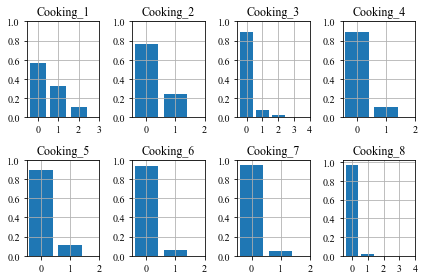

In [229]:
count=1
for i in list(sorted_dict.keys())[:8]:
    plt.subplot(2,4,count)
    time_dic = retrieve_daily_activity_prob(activity, i,activity_name)
    plt_bar_dic(time_dic, title="Cooking_"+str(count))
    count+=1
    if count>9:
        break
plt.tight_layout()

In [230]:
# store the data into dic
count=1
daily_activation_pro = []
for i in list(sorted_dict.keys()):
    time_dic = retrieve_daily_activity_prob(activity, i,activity_name)
    daily_activation_pro.append(time_dic)
    count+=1

In [231]:
activity_name ="cleaning"

In [232]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\daily_activation_pro.pkl'.format(activity_name), 'wb') as f:
    pickle.dump(daily_activation_pro, f)

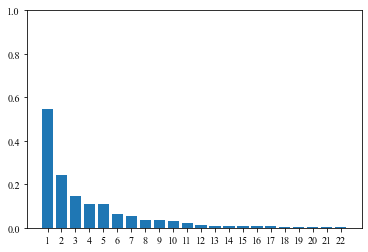

In [233]:
daily_probability=list(sorted_dict.values())
plt.bar(x=[i for i in range(1,len(daily_probability)+1)],height=np.array(daily_probability)/365)
plt.xticks([i for i in range(1,len(daily_probability)+1)])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.show()

In [234]:
labels = np.array(labels)

In [140]:

kitchen_df = load_categories(file_path, [5,6,39,40,41,22],['washing machine','dishwasher','hair dryer','straighteners',"iron",'vacuum'],'active')

/building1/elec/meter5
/building1/elec/meter6
/building1/elec/meter39
/building1/elec/meter40
/building1/elec/meter41
/building1/elec/meter22


In [141]:
statistic_lst[1]

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.25      , 0.46568627])

In [142]:
np.where(labels==11)

(array([ 10,  56, 195, 240, 398], dtype=int64),)

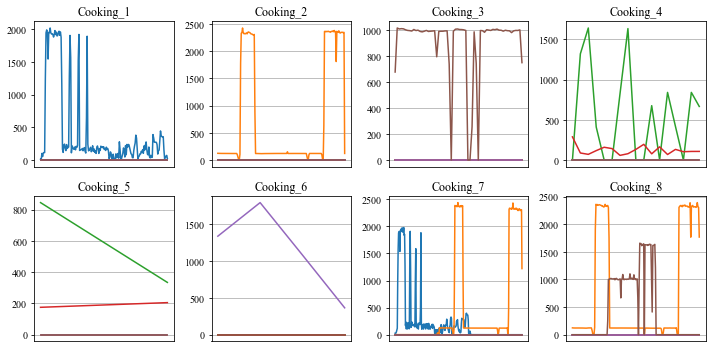

In [143]:
# breakfast -> 2 304


plt.figure(figsize=(10,5))
plt.subplot(2,4,1)
time = activity[activity_name][2]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.plot(grid="--")
plt.title("Cooking_1")
plt.xticks([])
plt.subplot(2,4,2)

# kettle ->>4 197
time = activity[activity_name][0]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_2")

plt.xticks([])

#### Preparing for dinner 134
plt.subplot(2,4,3)
time = activity[activity_name][5]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_3")

plt.xticks([])

# dinner 130
plt.subplot(2,4,4)
time = activity[activity_name][4]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.xticks([])
plt.title("Cooking_4")


# dinner 116
plt.subplot(2,4,5)
time = activity[activity_name][9]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_5")

plt.xticks([])

# dinner 5 93
plt.subplot(2,4,6)
time = activity[activity_name][18]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_6")

plt.xticks([])

# dinner 7 74
plt.subplot(2,4,7)
time = activity[activity_name][37]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.xticks([])
plt.title("Cooking_7")

# dinner 8 52
plt.subplot(2,4,8)
time = activity[activity_name][10]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_8")
plt.xticks([])

plt.tight_layout()
plt.show()

In [144]:
activity

{'cooking': [(Timestamp('2013-05-01 06:26:30', freq='30S'),
   Timestamp('2013-05-01 07:53:30', freq='30S')),
  (Timestamp('2013-05-01 12:08:00', freq='30S'),
   Timestamp('2013-05-01 13:36:00', freq='30S')),
  (Timestamp('2013-05-01 15:34:30', freq='30S'),
   Timestamp('2013-05-01 15:35:30', freq='30S')),
  (Timestamp('2013-05-01 17:03:30', freq='30S'),
   Timestamp('2013-05-01 18:48:30', freq='30S')),
  (Timestamp('2013-05-02 06:49:30', freq='30S'),
   Timestamp('2013-05-02 07:29:00', freq='30S')),
  (Timestamp('2013-05-02 11:50:00', freq='30S'),
   Timestamp('2013-05-02 11:52:00', freq='30S')),
  (Timestamp('2013-05-02 14:14:00', freq='30S'),
   Timestamp('2013-05-02 14:32:00', freq='30S')),
  (Timestamp('2013-05-02 17:34:00', freq='30S'),
   Timestamp('2013-05-02 18:27:00', freq='30S')),
  (Timestamp('2013-05-02 19:39:30', freq='30S'),
   Timestamp('2013-05-02 19:56:00', freq='30S')),
  (Timestamp('2013-05-03 06:37:00', freq='30S'),
   Timestamp('2013-05-03 06:38:30', freq='30S')),

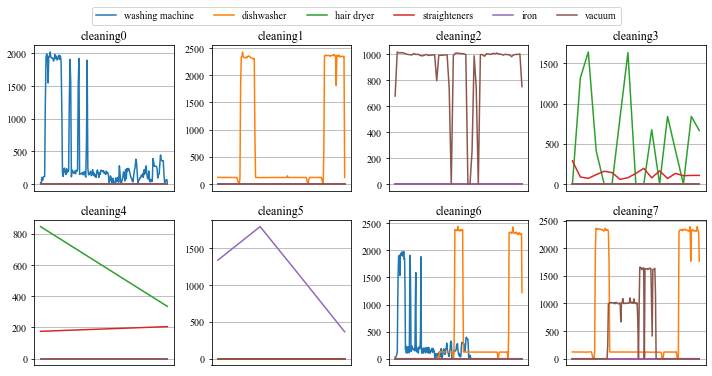

In [235]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(10,5))

# List of subplots titles and corresponding index
# titles = ["Cooking_1", "Cooking_2", "Cooking_3", "Cooking_4",
#           "Cooking_5", "Cooking_6", "Cooking_7", "Cooking_8"]
titles=[]
for i in range(8):
    titles.append(activity_name+str(i))

# Dictionary to store labels and their lines
labels_dic = {}
time_lst = [2,0, 5,4,9,18,37,10]
for idx, (time, title) in enumerate(zip(time_lst, titles)):
    ax = axs[idx // 4, idx % 4]  # Access the subplot
    start, end = activity[activity_name][time]
    for i in kitchen_df.columns:
        line, = ax.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
        if i not in labels_dic:
            labels_dic[i] = line  # Store the first line for each label
    ax.set_title(title)
    ax.grid("--")
    ax.set_xticks([])

# Adjust layout before adding legend
plt.tight_layout()

# Add a global legend at the top
fig.legend(handles=[labels_dic[i] for i in labels_dic], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))

plt.show()

# 创建augmentation array

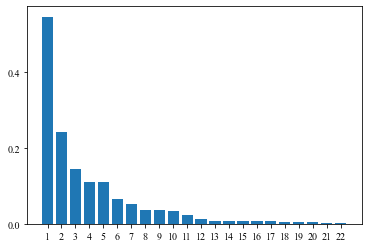

In [236]:
# 时间每天发生的次数
daily_probability=list(sorted_dict.values())
plt.bar(x=[i for i in range(1,len(daily_probability)+1)],height=np.array(daily_probability)/365)
plt.xticks([i for i in range(1,len(daily_probability)+1)])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.plot(grid="--")

plt.show()

In [237]:
# 活动发生的时间

In [238]:
sorted_dict

{0: 199,
 2: 88,
 3: 53,
 1: 40,
 5: 40,
 4: 24,
 7: 19,
 6: 13,
 9: 13,
 8: 12,
 10: 8,
 11: 5,
 14: 3,
 13: 3,
 15: 3,
 12: 3,
 18: 3,
 17: 2,
 20: 2,
 21: 2,
 16: 1,
 19: 1}

In [239]:
def get_label_prob(label, activity,activity_name):
    start = np.array(activity[activity_name])[np.where(labels==label)[0]][:,0]
    hour_times = {}
    for i in range(0,24):
        hour_times[i] = 0
    for i in start:
        hour_times[i.hour]+=1
    array = np.array(list(hour_times.values()))
    activation_proba = array/sum(array)
    return activation_proba

In [240]:
# start time
count=1
start_time_lst = []
for i in list(sorted_dict.keys()):
    start_time = get_label_prob(i, activity,activity_name)

    start_time_lst.append(start_time)
    count+=1

In [242]:
start_time_lst[0]

array([0.00502513, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01507538, 0.04522613, 0.12060302,
       0.09045226, 0.04522613, 0.05527638, 0.14572864, 0.09045226,
       0.08542714, 0.07537688, 0.06030151, 0.10050251, 0.03517588,
       0.01507538, 0.        , 0.01005025, 0.00502513])

In [243]:
np.save(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\start_time_pro.npy'.format(activity_name),start_time_lst)

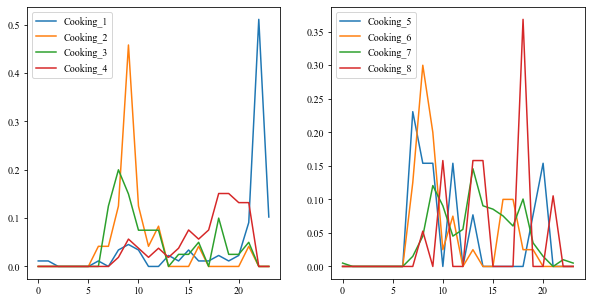

In [244]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
activity_1 = get_label_prob(2, activity,activity_name)
plt.plot(activity_1, label="Cooking_1")

plt.plot(grid="--")
activity_2 = get_label_prob(4, activity,activity_name)
plt.plot(activity_2, label="Cooking_2")
plt.plot(grid="--")

activity_3 = get_label_prob(1, activity,activity_name)
plt.plot(activity_3, label="Cooking_3")

activity_4 = get_label_prob(3, activity,activity_name)
plt.plot(activity_4, label="Cooking_4")
plt.plot(grid="--")
plt.legend()


plt.subplot(1,2,2)
activity_5 = get_label_prob(6, activity,activity_name)
plt.plot(activity_5, label="Cooking_5")
plt.plot(grid="--")

activity_6 = get_label_prob(5, activity,activity_name)
plt.plot(activity_6, label="Cooking_6")
plt.plot(grid="--")

activity_7 = get_label_prob(0, activity,activity_name)
plt.plot(activity_7, label="Cooking_7")

activity_8 = get_label_prob(7, activity,activity_name)
plt.plot(activity_8, label="Cooking_8")
plt.plot(grid="--")

plt.legend()
plt.show()

# 各活动持续时间

In [245]:
test = np.array(activity[activity_name])[np.where(labels==2)[0]]

In [246]:
(end - start).seconds//60

97

In [247]:
def get_duration_prob(label, activity,activity_name):
    activity = np.array(activity[activity_name])[np.where(labels==label)[0]]
    duration_lst = []

    for start, end in activity:
        duration = (end - start).seconds//60
        duration_lst.append(duration)
    return duration_lst

In [248]:
# start time
count=1
duration_lst = []
for i in list(sorted_dict.keys()):
    duration = get_duration_prob(i, activity,activity_name)
    duration_lst.append(duration)
    count+=1

In [249]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\duration_lst.pkl'.format(activity_name), 'wb') as f:
    pickle.dump(duration_lst, f)

## 各用电器在活动内的使用次数

In [250]:
activity = list(sorted_dict.keys())

In [251]:
stats[-4]["appliance_open_count"]

{'washing_machine': 1,
 'dishwasher': 0,
 'hair_dryer': 0,
 'straighteners': 0,
 'iron': 0,
 'vacuum': 0}

In [253]:
# 各用电器使用次数
appliance_use_time = {}
def retrieve_appliance_activation_prob(stats, labels,appliance_name_lst, label):
    appliance_open_count_lst = [stats[i]['appliance_open_count'] for i in np.where(labels==label)[0]]
    appliance_count_lst = [list(i.values()) for i in appliance_open_count_lst]
    appliance_count_lst = np.array(appliance_count_lst)
    appliance_level_dic = {}
    df = pd.DataFrame(data=np.array(appliance_count_lst),columns=appliance_name_lst)
    for name in appliance_name_lst:
        appliance_count = Counter(df.loc[:,name])
        appliance_count = {k: appliance_count[k] for k in sorted(appliance_count)}
        temp = {}
        for time, prob in appliance_count.items():
            temp[time] = prob/sum(appliance_count.values())
        appliance_level_dic[name] = temp
    return appliance_level_dic
activity_activation_prob = retrieve_appliance_activation_prob(stats, labels, appliance_name_lst, 9)

In [254]:
[stats[i]['appliance_open_count'] for i in np.where(labels==9)[0]]

[{'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 {'washing_machine': 1,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,

In [256]:
activity_activation_prob_dic = {}
for i in list(sorted_dict.keys())[0:8]:
    activity_activation_prob_dic[i] = retrieve_appliance_activation_prob(stats, labels, appliance_name_lst, i)

In [257]:
activity_activation_prob

{'washing_machine': {1: 1.0},
 'dishwasher': {1: 1.0},
 'hair_dryer': {0: 1.0},
 'straighteners': {0: 1.0},
 'iron': {0: 1.0},
 'vacuum': {0: 1.0}}

In [258]:
activity_appliance_activation_times = []
for i in list(sorted_dict.keys()):
    activity_appliance_activation_times.append(retrieve_appliance_activation_prob(stats, labels, appliance_name_lst, i))

In [259]:
activity_appliance_activation_times

[{'washing_machine': {1: 0.9447236180904522, 2: 0.05527638190954774},
  'dishwasher': {0: 1.0},
  'hair_dryer': {0: 1.0},
  'straighteners': {0: 1.0},
  'iron': {0: 1.0},
  'vacuum': {0: 1.0}},
 {'washing_machine': {0: 1.0},
  'dishwasher': {1: 1.0},
  'hair_dryer': {0: 1.0},
  'straighteners': {0: 1.0},
  'iron': {0: 1.0},
  'vacuum': {0: 1.0}},
 {'washing_machine': {0: 1.0},
  'dishwasher': {0: 1.0},
  'hair_dryer': {0: 1.0},
  'straighteners': {0: 1.0},
  'iron': {0: 0.9811320754716981, 1: 0.018867924528301886},
  'vacuum': {1: 0.5471698113207547,
   2: 0.2641509433962264,
   3: 0.11320754716981132,
   4: 0.07547169811320754}},
 {'washing_machine': {0: 1.0},
  'dishwasher': {0: 1.0},
  'hair_dryer': {1: 0.975, 2: 0.025},
  'straighteners': {1: 0.95, 2: 0.05},
  'iron': {0: 1.0},
  'vacuum': {0: 1.0}},
 {'washing_machine': {0: 1.0},
  'dishwasher': {0: 1.0},
  'hair_dryer': {1: 1.0},
  'straighteners': {0: 1.0},
  'iron': {0: 1.0},
  'vacuum': {0: 1.0}},
 {'washing_machine': {0: 1.0}

In [311]:
len(appliance_name_lst)

6

In [261]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\activity_appliance_activation_times.pkl'.format(activity_name), 'wb') as f:
    pickle.dump(activity_appliance_activation_times, f)

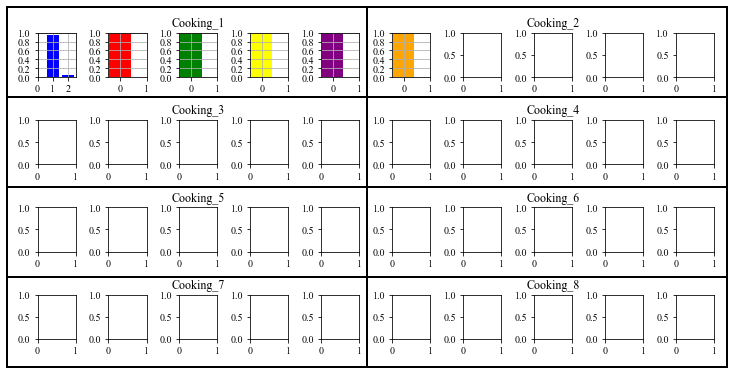

In [275]:
import matplotlib.patches as patches
appliance_color = {'washing_machine':'blue','dishwasher':'red',"hair_dryer":"green","straighteners":'yellow','iron':"purple",'vacuum':'orange'}
def plot_appliance_frequencies(data,appliances):

    fig, axes = plt.subplots(4, 10, figsize=(10, 5))
    titles = [f'Cooking_{i + 1}' for i in range(8)]
    # appliances = ["kettle", "breadmaker", "gas", "microwave", "toaster"]
    title_index = 1

    for i in range(0,4):
        ax = axes[i,2]
        ax.set_title("Cooking_{}".format(title_index))
        title_index+=1
        ax = axes[i,7]
        ax.set_title("Cooking_{}".format(title_index))
        title_index+=1
    for i, (title_index, cooking_data) in enumerate(data.items()):
        row = i//2
        for j, appliance in enumerate(appliances):
            ax = axes[row, j+(i%2)*5]
            freq = cooking_data.get(appliance, {})
            ax.bar(list(freq.keys()), list(freq.values()),color = appliance_color[appliance])
            ax.set_xticks(range(0,len(freq.values())+1))
            ax.set_yticks([i*0.1 for i in range(0,12,2)])
            # ax.set_title(f'{appliance}')
            ax.set_ylim(0, 1)
            ax.grid("--")
    # 创建一个黑色矩形边框，包含第0行第1列和第0行第2列的子图
    rect = patches.Rectangle((0, 0), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
    fig.patches.append(rect)

    rect = patches.Rectangle((0, 0.25), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
    # 在图上添加矩形
    fig.patches.append(rect)
    for i in range(0,100,25):
        rect = patches.Rectangle((0, i*0.01), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
        fig.patches.append(rect)
    for i in range(0,100,25):
        rect = patches.Rectangle((0.5, i*0.01), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
        fig.patches.append(rect)

    plt.tight_layout()  # Adjust layout to make room for suptitle
    plt.savefig("appliance.jpg")
    plt.show()
data = activity_activation_prob_dic
plot_appliance_frequencies(data,['washing_machine','dishwasher','hair_dryer','straighteners',"iron",'vacuum'])

## 使用时间的相对位置

In [276]:
#  画出事件开始时间的概率分布
time_slot = [round(i*0.1,1) for i in range(0,10,1)]

In [323]:
activity_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\activity_120'

activity = load_activity_dic(activity_path, ['cooking','cleaning','entertainment',"working"])

In [324]:
activity_time = [activity[activity_name][i] for i in list(np.where(np.array(labels)==2)[0])]

In [325]:
[activity[activity_name][i] for i in list(np.where(np.array(labels)==8)[0])]

[(Timestamp('2013-06-10 14:04:30', freq='30S'),
  Timestamp('2013-06-10 15:50:00', freq='30S')),
 (Timestamp('2013-06-26 07:58:30', freq='30S'),
  Timestamp('2013-06-26 10:02:00', freq='30S')),
 (Timestamp('2013-08-03 08:22:30', freq='30S'),
  Timestamp('2013-08-03 09:43:30', freq='30S')),
 (Timestamp('2013-10-27 08:17:00', freq='30S'),
  Timestamp('2013-10-27 10:15:00', freq='30S')),
 (Timestamp('2013-12-03 08:33:30', freq='30S'),
  Timestamp('2013-12-03 10:20:30', freq='30S')),
 (Timestamp('2013-12-29 11:00:30', freq='30S'),
  Timestamp('2013-12-29 12:44:30', freq='30S')),
 (Timestamp('2014-01-19 12:12:30', freq='30S'),
  Timestamp('2014-01-19 14:18:30', freq='30S')),
 (Timestamp('2014-03-18 07:00:00', freq='30S'),
  Timestamp('2014-03-18 08:38:00', freq='30S')),
 (Timestamp('2014-04-01 10:48:00', freq='30S'),
  Timestamp('2014-04-01 12:49:00', freq='30S')),
 (Timestamp('2014-04-07 10:34:00', freq='30S'),
  Timestamp('2014-04-07 12:23:00', freq='30S')),
 (Timestamp('2014-04-11 08:25:

In [363]:
from datetime import datetime
from typing import List, Tuple, Dict

def retrieve_proportion(activity, appliance_time_dic, label,activity_name,appliance_name_lst):
    activity_time = [activity[activity_name][i] for i in list(np.where(np.array(labels)==label)[0])]
    # 初始化一个空列表来存储每个活动的统计信息
    # appliance_name_lst = ["kettle","breadmaker","gas","microwave","toaster"]
    info = {}
    temp_dic = {}
    time_slot = [round(i*0.1,1) for i in range(0,10,1)]
    for i in time_slot:
        temp_dic[i] = 0
    for appliance_name in appliance_name_lst:
        info[appliance_name] = temp_dic.copy()

    # 遍历每个活动
    for start, end in activity_time:
        # 遍历每个用电器
        for appliance, times in appliance_time_dic.items():
            try:
                activity_lst = times[start.date()]
                # 遍历每个用电器的使用时间
                for time_start, time_end in activity_lst:
                    if start<=time_start<=end:
                        whole_time = (end-start).total_seconds()
                        start_time = (time_start-start).total_seconds()
                        proportion = round(start_time/whole_time,1)
                        info[appliance][proportion]+=1
            except Exception:
                pass
    temp = {}
    for appliance_name, dic in info.items():
        if sum(dic.values()) == 0:
            temp[appliance_name] = np.array(list(dic.values()))
        else:
            prob = np.array(list(dic.values()))/sum(dic.values())
            temp[appliance_name] = prob
    return temp

info = retrieve_proportion(activity,appliance_time_dic, 2 ,activity_name,appliance_name_lst)

In [364]:
stats[0]

{'appliance_open_count': {'washing_machine': 0,
  'dishwasher': 1,
  'hair_dryer': 0,
  'straighteners': 0,
  'iron': 0,
  'vacuum': 0},
 'appliance_types': {'dishwasher'},
 'duration': 97}

In [365]:
appliance_time_dic["dishwasher"]

{datetime.date(2013, 5, 1): [(Timestamp('2013-05-01 22:39:30', freq='30S'),
   Timestamp('2013-05-02 00:17:00', freq='30S'))],
 datetime.date(2013, 5, 4): [(Timestamp('2013-05-04 22:43:00', freq='30S'),
   Timestamp('2013-05-05 00:19:00', freq='30S'))],
 datetime.date(2013, 5, 10): [(Timestamp('2013-05-10 20:39:30', freq='30S'),
   Timestamp('2013-05-10 22:16:30', freq='30S'))],
 datetime.date(2013, 5, 14): [(Timestamp('2013-05-14 22:25:00', freq='30S'),
   Timestamp('2013-05-15 00:02:00', freq='30S'))],
 datetime.date(2013, 5, 18): [(Timestamp('2013-05-18 09:58:00', freq='30S'),
   Timestamp('2013-05-18 11:22:00', freq='30S'))],
 datetime.date(2013, 5, 20): [(Timestamp('2013-05-20 22:52:30', freq='30S'),
   Timestamp('2013-05-21 00:29:00', freq='30S'))],
 datetime.date(2013, 5, 22): [(Timestamp('2013-05-22 22:32:00', freq='30S'),
   Timestamp('2013-05-23 00:08:30', freq='30S'))],
 datetime.date(2013, 6, 5): [(Timestamp('2013-06-05 14:11:00', freq='30S'),
   Timestamp('2013-06-05 15:47

In [366]:
activity["cleaning"][0]

(Timestamp('2013-05-01 22:39:30', freq='30S'),
 Timestamp('2013-05-02 00:17:00', freq='30S'))

In [344]:
np.where(labels==2)[0]

array([  0,   6,  16,  24,  39,  42,  49,  59,  63,  70,  72,  75,  82,
        95, 100, 102, 107, 110, 115, 118, 121, 127, 130, 134, 144, 150,
       155, 159, 165, 166, 169, 173, 181, 183, 192, 201, 207, 214, 219,
       223, 226, 228, 259, 267, 280, 285, 290, 294, 298, 301, 309, 318,
       324, 330, 335, 347, 349, 356, 361, 370, 378, 384, 391, 394, 403,
       407, 416, 421, 424, 441, 448, 456, 459, 468, 474, 476, 483, 485,
       490, 495, 500, 504, 508, 517, 520, 525, 529, 534], dtype=int64)

In [329]:
sorted_dict.keys()

dict_keys([0, 2, 3, 1, 5, 4, 7, 6, 9, 8, 10, 11, 14, 13, 15, 12, 18, 17, 20, 21, 16, 19])

In [367]:
activation_proba = {}
for i in list(sorted_dict.keys())[:8]:
    info = retrieve_proportion(activity, appliance_time_dic, i,activity_name, appliance_name_lst)
    activation_proba[i] = info

In [368]:
activation_proba[3]

{'washing_machine': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'dishwasher': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'hair_dryer': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'straighteners': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'iron': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'vacuum': array([0.6       , 0.02352941, 0.02352941, 0.02352941, 0.07058824,
        0.04705882, 0.01176471, 0.04705882, 0.07058824, 0.08235294])}

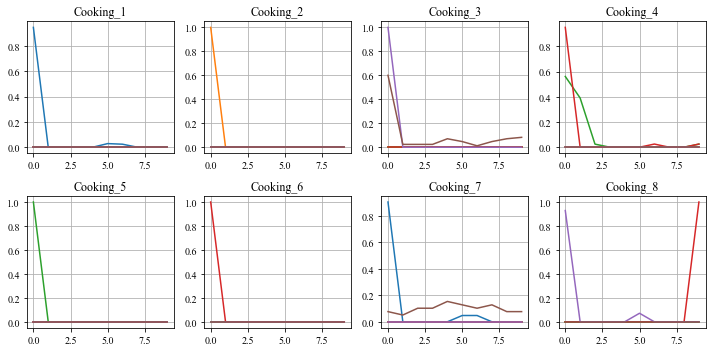

In [369]:
activation_proba = {}
count = 1
plt.figure(figsize=(10,5))
for i in list(sorted_dict.keys())[:8]:
    plt.subplot(2,4, count)
    info = retrieve_proportion(activity, appliance_time_dic, i,activity_name, appliance_name_lst)
    df = pd.DataFrame(info)
    plt.plot(df)
    plt.grid("--")
    plt.title("Cooking_"+str(count))
    count+=1
plt.tight_layout()


In [370]:
appliance_start_proba = []
for i in list(sorted_dict.keys()):
    info = retrieve_proportion(activity, appliance_time_dic, i, activity_name,appliance_name_lst)
    appliance_start_proba.append(info)

In [371]:
appliance_start_proba[3]

{'washing_machine': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'dishwasher': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'hair_dryer': array([0.56097561, 0.3902439 , 0.02439024, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02439024]),
 'straighteners': array([0.95 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.   , 0.   ,
        0.025]),
 'iron': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'vacuum': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [372]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\appliance_start_proba.pkl'.format(activity_name), 'wb') as f:
    pickle.dump(appliance_start_proba, f)

In [ ]:
appliance_start_proba[2]